# Aula 3: Teste de Hipótese, significância e interpretação

Conceito de distribuições estatísticas. 

Todos os registros (a respeito de qualquer fenômeno) terão: 

1) significado e disposição em conjunto; 

2) disposição em alguma sequencia;

3) aleatoriedade como pressuposto; 

4) variabilidade como pressuposto; 

5) resultados observados E resultados possíveis.  

Toda distribuição possui uma função matemática correlata; todo teste estatístico vai se ancorar em alguma distribuição; todos os testes de hipótese farão uso de distribuições para se inferir sobre os dados. 

# 1. Distribuições: da matemática à um olhar sobre a população e às variáveis aleatórias

Variáveis aleatórias são medidas e analizadas em termos de suas propriedades estatísticas, umas das características subjacentes é a sua função de distribuição.


O que o pesquisador precisa fazer? CHECAR SE OS SEUS DADOS SE ENCAIXAM NOS PRESSUPOSTOS DE CADA DISTRIBUIÇÃO. CASO CONTRÁRIO, NÃO É POSSÍVEL REALIZAR A ANÁLISE.

### Teorema matemático do limite central e o quadro de Galton  (voltaremos em detalhes na próxima aula)

"Quando variáveis aleatória independentes são somadas, elas tendem a adquirir a forma de uma distribuição normal como resultado"


ASSISTAM: 
QUADRO DE GALTON 

https://www.youtube.com/watch?v=Kq7e6cj2nDw&ab_channel=RandomStuff

https://www.youtube.com/watch?v=03tx4v0i7MA&ab_channel=AristomenisAntoniadis

In [7]:
# teoria da probabilidade: distribuição binomial/Bernoulli com 5 lançamentos de 1 moeda (honesta, 50% de chance). Quantos deram cara?


binon <- rbinom(5,1,.5)
binon


[1] 0 0 1 1 1

[1] 63 73 74 71 65

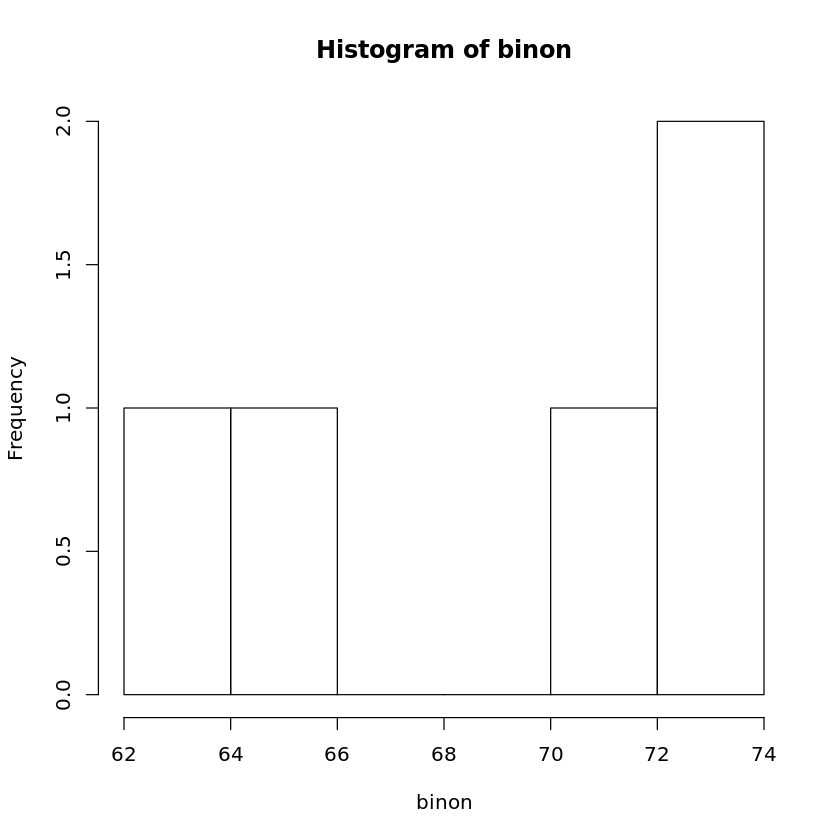

In [8]:
# complexificando a distribuição binomial/Bernoulli: 3 lançamentos de 150 moedas (honestas, 50% de chance). Quantas moedas deram cara?


binon <- rbinom(5,150,.5)
binon


hist(binon)

### Em direção à estatística: Normal, T, F e adjacências...

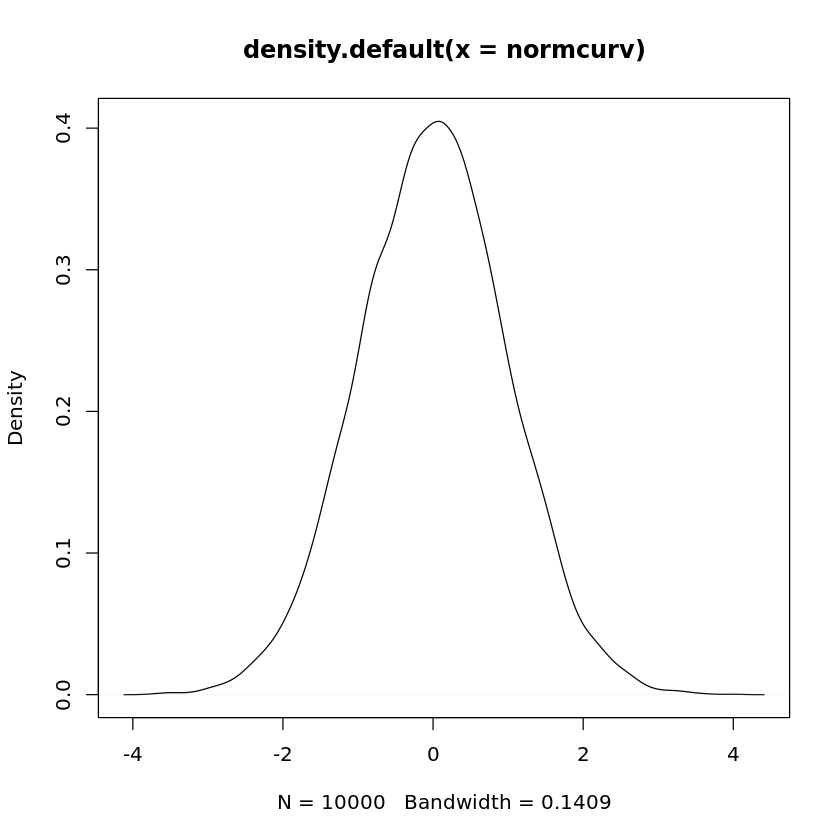

In [6]:
normcurv <- rnorm(10000)

densnormcurv <- density(normcurv)

plot(densnormcurv)

#### Poisson e Qui-quadrado: comportamentos alternativos para tempo e associação entre valores

In [9]:
# Poisson: 20 ocorrências ao longo do tempo, lambda = 5:

rpois(20, 5)


[1] 6 7 1 3 3 5 2 3 3 3 3 3 1 4 6 6 3 3 5 8

NULL

ERROR: Error in structure(.Call(C_tukeyline, as.double(xy$x[ok]), as.double(xy$y[ok]), : insufficient observations


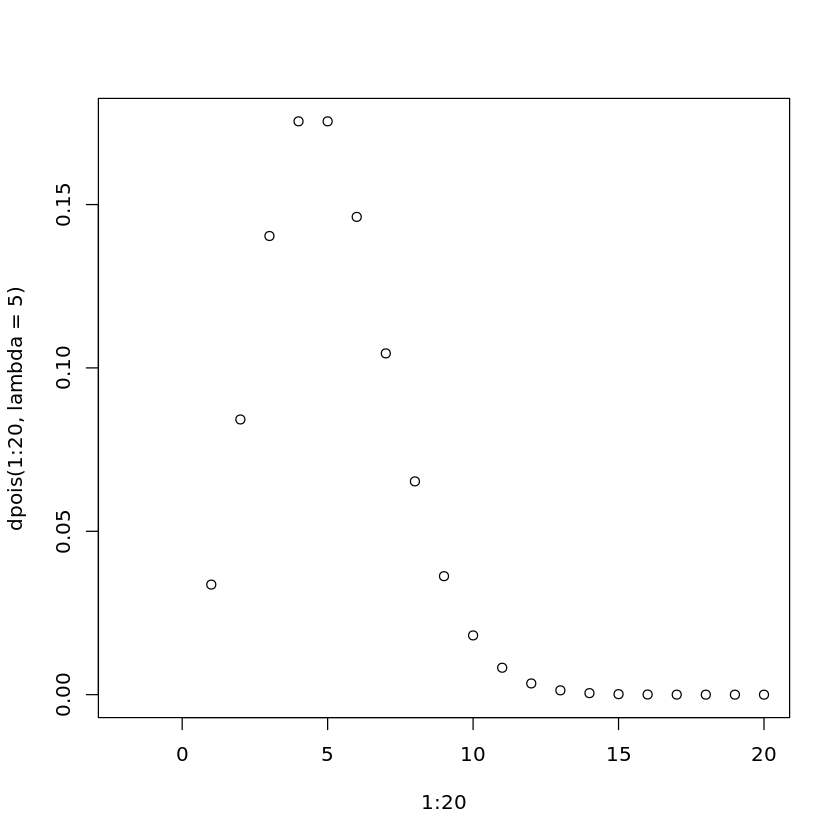

In [10]:
# distribuição de Poisson: probabilidade para dados discretos, k número de ocorrências (no caso, k=1 a 20) ao longo do tempo,
# com a probabilidade de certo valor ocorrer (valor de lambda/parâmetro fixado e probabilidade no eixo y).

poiss <- plot(1:20, dpois(1:20, lambda=5 ), xlim=c(-2,20))
poiss

line(poiss)

[1]  9.985682 13.117085 12.339283 18.457609 20.244750  8.001162 12.390316
 [8] 13.394285 15.629202 10.389282 15.172907  7.853108  7.437994  6.082429
[15]  5.903623  6.672210 15.152789  8.046890  7.596043 10.702701 17.955412
[22]  9.487331  7.884355 10.684390 16.026851  7.135230  5.555532  5.091078
[29]  6.262190 14.682376  4.246040  7.952001  9.530383 12.365264  8.718236
[36] 26.090796  8.013893 12.051985  6.878322 21.000274

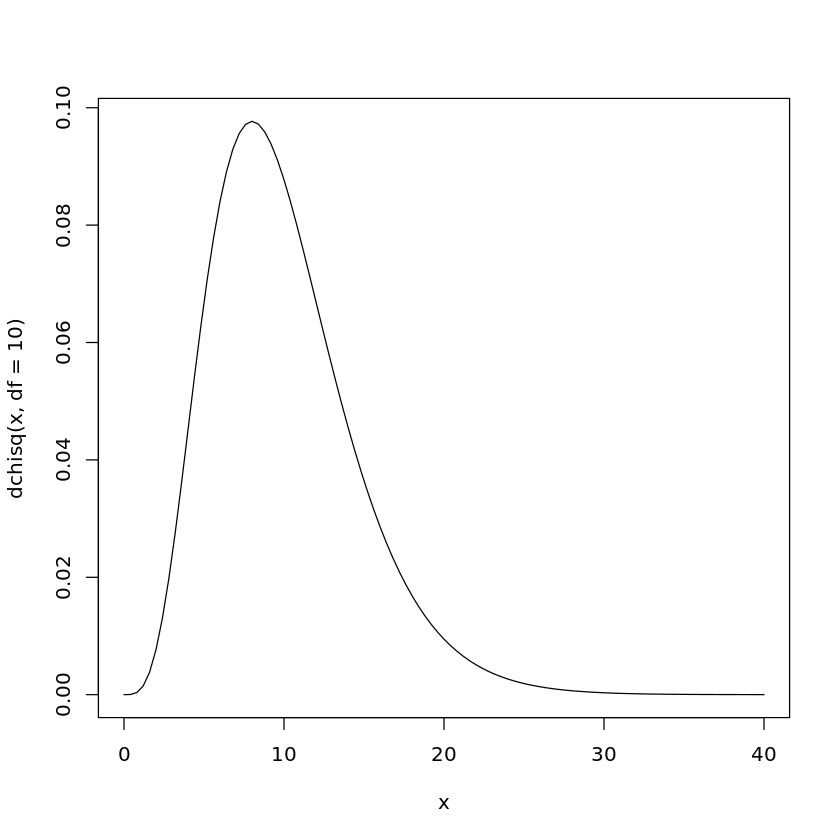

In [11]:
# distribuição qui-quad de números aleatórios (de 0 a 40) e graus de liberdade = 10 

rchisq(40, 10)

curve(dchisq(x, df = 10), from = 0, to = 40)

# 2. Testes de Hipótese

ASSISTAM!

Karl Popper's Falsification: https://www.youtube.com/watch?v=wf-sGqBsWv4&ab_channel=BBCRadio4

# 2.1 Estrutura

Forma organizada para tomar decisões e fazer generalizações a partir de parâmetros.

Estrutura de uma hipótese: AFIRMAÇÃO baseada em MEDIDA + PARÂMETRO POPULACIONAL [MÉDIA, PROPORCÃO OU VARIÂNCIA DA POPULAÇAO. Toda hipótese terá uma HIPÓTESE ALTERNATIVA, que é o COMPLEMENTO (independente e que deve servir para compor o espaço amostral probabilístico) da afirmação da primeira hipótese.

Hipótese nula (H0, “hipótese básica”, supõe-se sempre como verdadeira): contém igualdade e/ou maior/menor ≥ (maior ou igual a) e ≤ (menor ou igual a).

Hipótese alternativa (HA): sempre o diferente/inverso da hipótese nula, com >, < ou ≠. 


[DICA: olhar sempre o contexto para definir a hipótese nula e a representação matemática]


Diferenças entre testes:

Teste unilateral: HA com valores maior ou menor (> ou <);

Teste bilateral: HA com valor de diferente/não igual a (≠)


# 2.2 Erros I e II

Erros previstos para a interpretação/DECISÃO do resultado

O conceito de erros estatísticos supõe a possibilidade de se “errar” quando se infere algo a respeito de uma população (generalizar equivocadamente sobre os dados). O erro consiste em uma margem do dado amostral que poderá não se “encaixar” adequadamente no fenômeno existente de fato (a população).

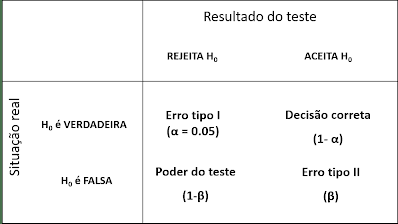

In [15]:
library("IRdisplay")
display_png(file="Aula3_quadro_teste_hipotese.png")

- Alfa: probabilidade do erro tipo I
- Beta: probabilidade do erro tipo II

Raciocínio: se diminui o Erro TI, aumenta o Erro TII. E vice-versa (os erros são reduzidos com aumento da amostra).

# 2.3 Nível de significância é igual ao ALFA.


Na prática, SOMENTE ALFA É CONTROLÁVEL (beta fica num plano estritamente teórico-abstrato). 

ALFA É PRÉ-FIXADO (de 0,01 a 0,10 usualmente). 

SEMPRE que o p-valor for muito pequeno, REJEITA-SE H0. O tamanho do p-valor é sempre relativo ao tamanho pré-fixado de alfa. Quanto menor o p-valor do teste, MAIS EVIDÊNCIA HÁ para se rejeitar a hipótese nula. P-valor pequeno indica EVENTO PROBABILISTICAMENTE RARO.

BOA PRÁTICA INTERPRETATIVA NO TESTE DE HIPÓTESE, p-valor é constituído por 2 partes (Kirk 1999): 

1) a probabilidade de observar eventos iguais ocorrerem (quando se compara p-valor de outros eventos dentro do mesmo espaço amostral), 2) o valor da probabilidade que um evento aleatório seja gerado/aconteça por acaso.
O teste de hipótese precisa considerar o quão raro EM TERMOS RELATIVOS é uma variável aleatória.

Valor crítico resultante do nível de significância do teste e da região crítica do teste (sempre conectada ao alfa).

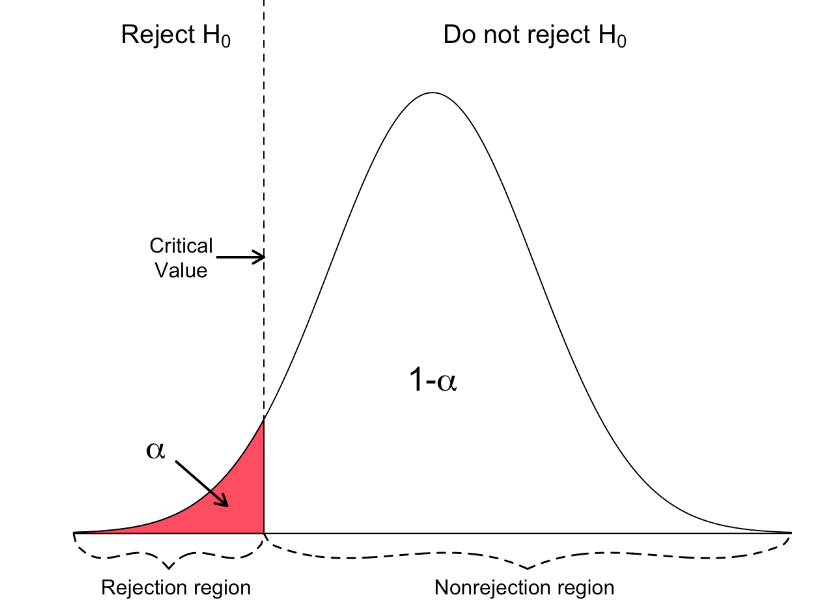

In [26]:
display_png(file="Aula3_valor_critico.png") #In: https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html 

Quadro de decisão em condição de incerteza

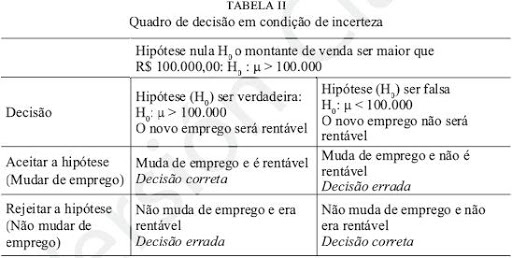

In [27]:
#### SISTEMATIZAÇÃO DE HIPÓTESES: In: http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1665-24362011000200005

display_png(file="Aula3_explo_teste_hipotese.png")


# 2.4 Técnicas interpretativas de análise de poder estatístico 

A seguir, um passo a passo sobre como proceder interpretações em TODOS os testes

# 2.4.1 o tamanho do efeito (comparação das duas distribuições) 

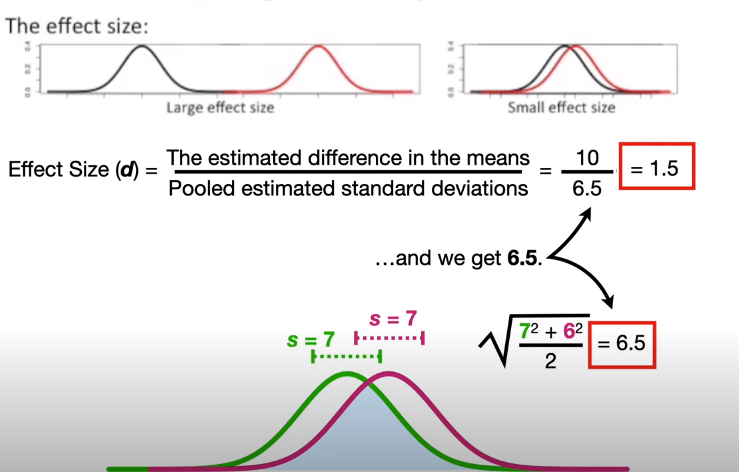

In [28]:
#### source: statquest

display_png(file="Aula3_comparacao_efeito_distribuicoes.png")

Análise de poder estatístico de teste: calculando-se o TAMANHO DO EFEITO (d = 1,5) (a partir de médias 14 e 4 – diferença estimada de 10) e desvios 7)e considerando-se um ALFA = 0,05, pode-se utilizar uma calculadora de poder estatístico (no caso, PODER = 0,85 ou “tem-se ao menos 85% de chance de se rejeitar CORRETAMENTE H0 considerando o alfa=0,05”) (https://www.sphanalytics.com/statistical-power-calculator-using-average-values/)

# 2.4.2 a variabilidade dos dados:

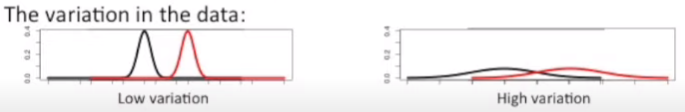

In [29]:
display_png(file="Aula3_variabil_dados.png")

# 2.4.3 o tamanho da amostra:

Teorema do limite central e lei dos grandes números

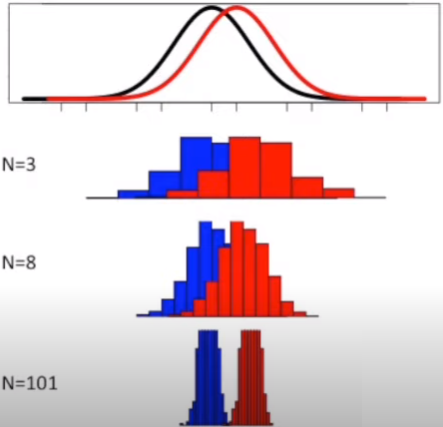

In [30]:
display_png(file="Aula3_tamanho_amostral.png")

# 2.4.4 o teste estatístico utilizado


Alguns são mais poderosos do que outros, depende da aderência à distribuição